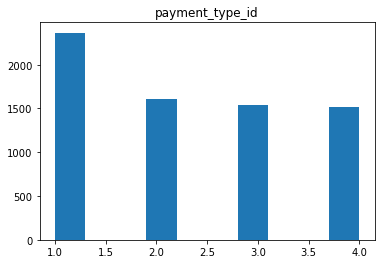

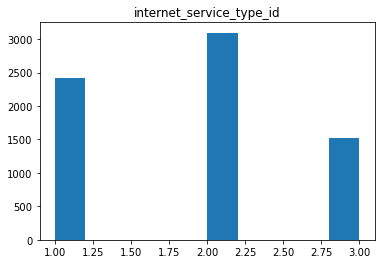

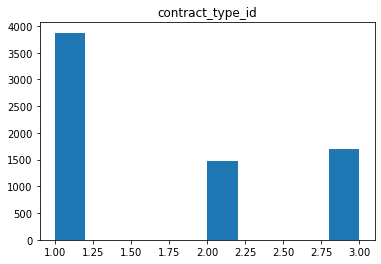

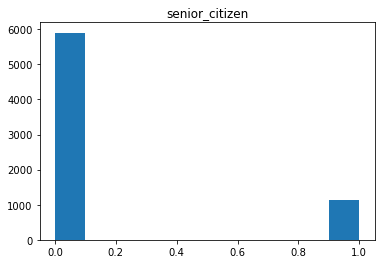

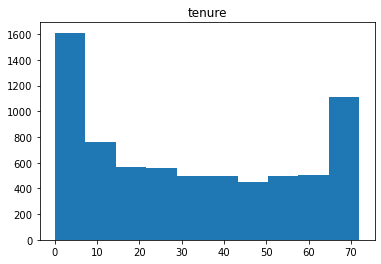

1984-GPTEH    1
2842-JTCCU    1
5312-IRCFR    1
6474-FVJLC    1
4537-DKTAL    1
             ..
3938-YFPXD    1
8640-SDGKB    1
8800-ZKRFW    1
2775-SEFEE    1
5055-MGMGF    1
Name: customer_id, Length: 7043, dtype: int64
1984-GPTEH    0.000142
2842-JTCCU    0.000142
5312-IRCFR    0.000142
6474-FVJLC    0.000142
4537-DKTAL    0.000142
                ...   
3938-YFPXD    0.000142
8640-SDGKB    0.000142
8800-ZKRFW    0.000142
2775-SEFEE    0.000142
5055-MGMGF    0.000142
Name: customer_id, Length: 7043, dtype: float64
----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Nam

In [1]:
import numpy as np
import acquiretelco
import telco_prep
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Acquire data 

### We will use acquiretelco module to acquire data; detail code can be found at acquiretelco.py file
 
    we will acquire this data from telco_df 
    
 - sql_query = '''
                   SELECT * FROM customers
                   JOIN contract_types USING (contract_type_id)
                   JOIN internet_service_types USING (internet_service_type_id)
                   JOIN payment_types USING (payment_type_id)
                  '''

In [2]:
df = acquiretelco.get_telco_data()

In [3]:
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)


### Observe data

In [4]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
### As we can see Dtype for total_charge is object we have to change it to float 
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
### Identify missing values 
print(df.isnull().sum())

payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64


In [7]:
### Observe total % of null value 
print(df.isnull().sum()/len(df) * 100)

# its roughly 0.15% of the data therefore we will drop this missing observations 


payment_type_id             0.000000
internet_service_type_id    0.000000
contract_type_id            0.000000
customer_id                 0.000000
gender                      0.000000
senior_citizen              0.000000
partner                     0.000000
dependents                  0.000000
tenure                      0.000000
phone_service               0.000000
multiple_lines              0.000000
online_security             0.000000
online_backup               0.000000
device_protection           0.000000
tech_support                0.000000
streaming_tv                0.000000
streaming_movies            0.000000
paperless_billing           0.000000
monthly_charges             0.000000
total_charges               0.156183
churn                       0.000000
contract_type               0.000000
internet_service_type       0.000000
payment_type                0.000000
dtype: float64


In [8]:
## Get data where tenure is not equal to 0 becasue people with 0 tenure signifies that new customers 
df = df[df.tenure !=0]
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.90,No,Month-to-month,None,Mailed check


In [9]:
# Let's look at the summary statistics of numeric columns 
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,2.315557,1.872582,1.688567,0.162400,32.421786,64.798208,2283.300441
std,1.149523,0.737271,0.832934,0.368844,24.545260,30.085974,2266.771362
min,1.000000,1.000000,1.000000,0.000000,1.000000,18.250000,18.800000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.587500,401.450000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000,1397.475000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.862500,3794.737500
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000,8684.800000


In [10]:
# from pandas_profiling import ProfileReport

In [11]:
# ProfileReport(df)

In [12]:
# let's check object columns 
object_columns = df.columns[[df[col].dtype == 'O' for col in df.columns]]
object_columns
# below are our Dtype object 


Index(['customer_id', 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [13]:
for col in object_columns:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('percentage:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

CUSTOMER_ID
Count:
1984-GPTEH    1
6963-EZQEE    1
0840-DFEZH    1
1453-RZFON    1
6229-UOLQL    1
             ..
8800-ZKRFW    1
2275-RBYQS    1
9799-CAYJJ    1
1723-HKXJQ    1
5055-MGMGF    1
Name: customer_id, Length: 7032, dtype: int64


percentage:
1984-GPTEH    0.000142
6963-EZQEE    0.000142
0840-DFEZH    0.000142
1453-RZFON    0.000142
6229-UOLQL    0.000142
                ...   
8800-ZKRFW    0.000142
2275-RBYQS    0.000142
9799-CAYJJ    0.000142
1723-HKXJQ    0.000142
5055-MGMGF    0.000142
Name: customer_id, Length: 7032, dtype: float64
--------------------------


GENDER
Count:
Male      3549
Female    3483
Name: gender, dtype: int64


percentage:
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
--------------------------


PARTNER
Count:
No     3639
Yes    3393
Name: partner, dtype: int64


percentage:
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
--------------------------


DEPENDENTS
Count:
No     4933
Yes    2099
Name: dependents, dt

In [14]:
### Remove redundant and unnecessary columns Which we will drop during Data prepration 
# Drop redundant and unhelpful columns.

# df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [15]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.40,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.20,No,Two year,DSL,Bank transfer (automatic)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   customer_id               7032 non-null   object 
 4   gender                    7032 non-null   object 
 5   senior_citizen            7032 non-null   int64  
 6   partner                   7032 non-null   object 
 7   dependents                7032 non-null   object 
 8   tenure                    7032 non-null   int64  
 9   phone_service             7032 non-null   object 
 10  multiple_lines            7032 non-null   object 
 11  online_security           7032 non-null   object 
 12  online_backup             7032 non-null   object 
 13  device_protection         7032 non-null   object 
 14  tech_sup

## DATA PREPRATION 
- Since we have removed unnecessary columns and duplicate columns. We will clean our data 

In [17]:
df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

In [18]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,No,Two year,DSL,Mailed check,1,1,1,1,1,0
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,No,Two year,DSL,Credit card (automatic),0,0,0,0,0,0
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,No,Two year,DSL,Bank transfer (automatic),1,0,0,0,0,0
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,No,Two year,DSL,Credit card (automatic),0,1,1,0,1,0
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,No,Two year,DSL,Bank transfer (automatic),0,1,0,1,1,0


In [19]:
# Drop the original object columns 
df.drop(columns=['payment_type_id', 'internet_service_type_id',
            'contract_type_id', 'customer_id'], inplace=True)

In [20]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,No,Two year,DSL,Mailed check,1,1,1,1,1,0
1,Male,0,No,No,54,No,No phone service,Yes,No,No,...,No,Two year,DSL,Credit card (automatic),0,0,0,0,0,0
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,...,No,Two year,DSL,Bank transfer (automatic),1,0,0,0,0,0
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,...,No,Two year,DSL,Credit card (automatic),0,1,1,0,1,0
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,...,No,Two year,DSL,Bank transfer (automatic),0,1,0,1,1,0


In [21]:
# using dummy to replace column value to 1 and 0 

dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
dummy_df

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
7039,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
7040,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
7041,0,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [22]:
# concat df and dummy_df 
# Combine newly encoded

df = pd.concat([df, dummy_df], axis=1)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,0,0,1
1,Male,0,No,No,54,No,No phone service,Yes,No,No,...,1,0,0,0,1,0,0,1,0,0
2,Female,0,No,No,56,No,No phone service,Yes,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,Male,0,Yes,Yes,20,No,No phone service,Yes,No,Yes,...,0,0,0,0,1,0,0,1,0,0
4,Male,0,Yes,No,72,Yes,Yes,No,Yes,Yes,...,1,0,1,0,1,0,0,0,0,0


In [23]:
df.shape

(7032, 47)

In [24]:
# Convert categorical data to numeric 
 
 #df['streaming_tv_bool'] = df.streaming_tv.map({'Yes': 1, 'No': 0, 'No internet service': 0})

# df = df.replace({'streaming_tv': {'Yes':1, 'No':0, 'No internet service':0}})

#  {'gender': {'Male':0, 'Female':1}})
#    {'partner':{'Yes':1, 'No': 0}})
#    {'dependents':{'Yes':1, 'No': 0}})
#   {'phone_service': {'Yes':1, 'No':0}})
#   {'tech_support':{'Yes':1, 'No':0, 'No internet service':0} })
#    {'churn':{'Yes':1, 'No': 0}})
#    {'streaming_tv': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'multiple_lines': {'Yes':1, 'No':0, 'No phone service':0}})
#    {'online_security': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'online_backup': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'device_protection': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'streaming_movies': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'paperless_billing': {'Yes':1, 'No':0, 'No internet service':0}})
#    {'payment_type': {'Mailed check': 0, 'Electronic check':0, 'Bank transfer (automatic)':1, 'Credit card (automatic)':1}})"""

In [25]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes
multiple_lines,Yes,No phone service,No phone service,No phone service,Yes
online_security,Yes,Yes,Yes,Yes,No
online_backup,Yes,No,Yes,No,Yes
device_protection,Yes,No,Yes,Yes,Yes


In [26]:
df.shape

(7032, 47)

## SPLIT DATA 

In [27]:
## in our telco_prep.py we have defined a function that splits data into train, test and validate 
# with stratification of churn column 

    

In [28]:
train_validate, telco_test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn_encoded)

telco_train, telco_validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn_encoded)


In [29]:
print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 47)
(1688, 47)
(1407, 47)


In [30]:
### This concludes data prepration phase 

### Exploratory Data Analysis 

-  Explore variables to discover relationships, correlation
 
-  Formulate hypothesis and perform hypothesis test

In [31]:
telco_train.churn_encoded.value_counts()

0    2891
1    1046
Name: churn_encoded, dtype: int64

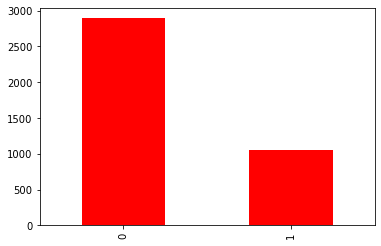

In [32]:
# Visualize total number of churn and no churn  
telco_train.churn_encoded.value_counts().plot(kind = 'bar', color = 'red')
plt.show()

In [33]:
# lets check how many of our customers churn?
print(f'Number of customers churn : {telco_train.churn_encoded.value_counts()[1]}')
print('')

print(f'Percentage of customers  churn: {telco_train.churn_encoded.value_counts()[1]/len(telco_train)*100}')

## Approximately 27 % of our customers churn


Number of customers churn : 1046

Percentage of customers  churn: 26.56845313690627


In [34]:
churn_rate = telco_train.churn_encoded.mean()
churn_rate

0.2656845313690627

In [35]:
# lets Split data whether they churn or not 
churn = telco_train[telco_train['churn_encoded'] == 1]
no_churn = telco_train[telco_train['churn_encoded'] == 0]

In [36]:
print(churn.shape)
print(no_churn.shape)

(1046, 47)
(2891, 47)


In [37]:
no_churn.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6096,Female,0,Yes,No,70,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,0
1603,Male,0,Yes,Yes,15,Yes,No,No,Yes,Yes,...,0,0,1,0,0,0,0,0,0,1
5350,Female,1,Yes,No,52,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
2068,Male,0,No,No,39,No,No phone service,No,No,No,...,0,0,1,0,0,0,0,0,1,0
6366,Female,0,Yes,No,32,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1


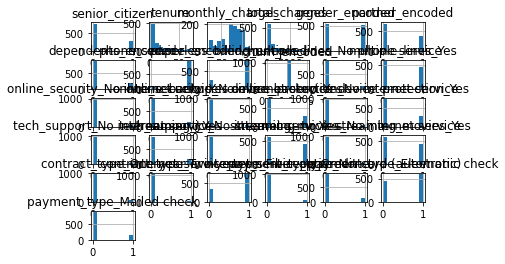

In [38]:
churn.hist();

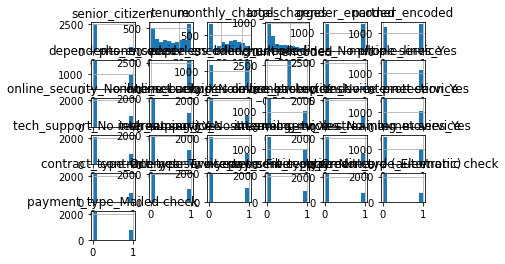

In [39]:
no_churn.hist();

In [40]:
stat1 = churn.describe().T
stat1

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1046.0,0.267686,0.442965,0.00,0.000,0.000,1.000,1.0
tenure,1046.0,18.471319,20.088146,1.00,2.000,10.000,30.750,72.0
monthly_charges,1046.0,73.662428,24.884594,18.85,55.200,79.075,94.000,117.8
total_charges,1046.0,1547.428394,1927.458468,18.85,134.775,666.575,2362.025,8684.8
gender_encoded,1046.0,0.486616,0.500060,0.00,0.000,0.000,1.000,1.0
partner_encoded,1046.0,0.360421,0.480352,0.00,0.000,0.000,1.000,1.0
dependents_encoded,1046.0,0.172084,0.377634,0.00,0.000,0.000,0.000,1.0
phone_service_encoded,1046.0,0.899618,0.300653,0.00,1.000,1.000,1.000,1.0
paperless_billing_encoded,1046.0,0.744742,0.436215,0.00,0.000,1.000,1.000,1.0
churn_encoded,1046.0,1.000000,0.000000,1.00,1.000,1.000,1.000,1.0


In [41]:
stat2= no_churn_stat = no_churn.describe().T
stat2

,count,mean,std,min,25%,50%,75%,max
senior_citizen,2891.0,0.126946,0.332970,0.00,0.0,0.00,0.0,1.00
tenure,2891.0,37.583535,24.349023,1.00,14.0,37.00,61.0,72.00
monthly_charges,2891.0,60.764182,31.116136,18.55,25.0,63.55,86.6,118.75
total_charges,2891.0,2547.079505,2348.789040,18.80,570.0,1651.95,4252.1,8672.45
gender_encoded,2891.0,0.493255,0.500041,0.00,0.0,0.00,1.0,1.00
partner_encoded,2891.0,0.528191,0.499291,0.00,0.0,1.00,1.0,1.00
dependents_encoded,2891.0,0.343480,0.474952,0.00,0.0,0.00,1.0,1.00
phone_service_encoded,2891.0,0.901764,0.297685,0.00,1.0,1.00,1.0,1.00
paperless_billing_encoded,2891.0,0.532688,0.499017,0.00,0.0,1.00,1.0,1.00
churn_encoded,2891.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00


In [42]:
# Check the differences in stastatics between customers who churn and did not churn

stastaical_difference = stat2 -stat1
stastaical_difference

,count,mean,std,min,25%,50%,75%,max
senior_citizen,1845.0,-0.140741,-0.109995,0.00,0.000,0.000,-1.000,0.00
tenure,1845.0,19.112216,4.260877,0.00,12.000,27.000,30.250,0.00
monthly_charges,1845.0,-12.898246,6.231542,-0.30,-30.200,-15.525,-7.400,0.95
total_charges,1845.0,999.651111,421.330572,-0.05,435.225,985.375,1890.075,-12.35
gender_encoded,1845.0,0.006639,-0.000019,0.00,0.000,0.000,0.000,0.00
partner_encoded,1845.0,0.167770,0.018939,0.00,0.000,1.000,0.000,0.00
dependents_encoded,1845.0,0.171396,0.097318,0.00,0.000,0.000,1.000,0.00
phone_service_encoded,1845.0,0.002147,-0.002968,0.00,0.000,0.000,0.000,0.00
paperless_billing_encoded,1845.0,-0.212054,0.062802,0.00,0.000,0.000,0.000,0.00
churn_encoded,1845.0,-1.000000,0.000000,-1.00,-1.000,-1.000,-1.000,-1.00


### From above we can see that following factors are causing higher churn rate 
- Monthly charges 
- Fiber Optic 
- Payment method (Electornic Check)
- Senior Citizen 

### 1. Is monthly charge driver for Churn

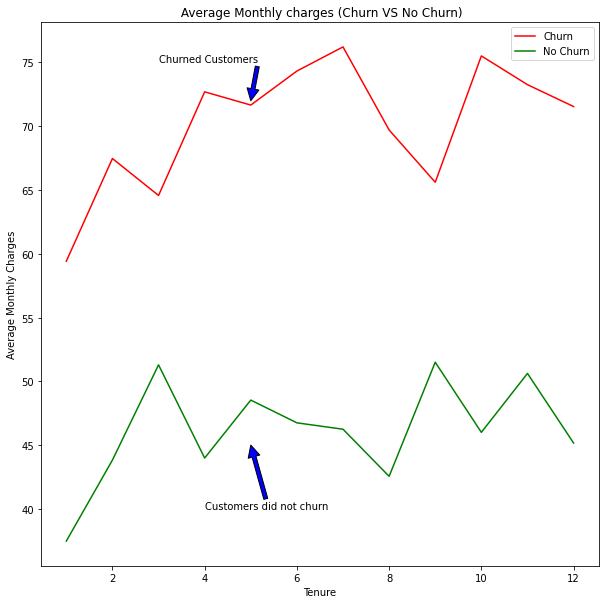

In [43]:
# What factor influenced churn? Let's check monthly charge? 

plt.figure(figsize= (10,10))

telco_train[telco_train.churn_encoded == 1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'red', label ='Churn')

telco_train[telco_train.churn_encoded == 0].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green', label = 'No Churn')

plt.xlabel('Tenure')

plt.ylabel('Average Monthly Charges')

plt.title(" Average Monthly charges (Churn VS No Churn)")

plt.annotate('Churned Customers', xy = (5, 72), xytext=(3, 75),arrowprops={'facecolor': 'blue'}, color = 'black')

plt.annotate('Customers did not churn', xy = (5, 45), xytext=(4, 40),arrowprops={'facecolor': 'blue'}, color = 'black')
plt.legend()
plt.show()

### 2. Is Internet Service Type factor for churn 

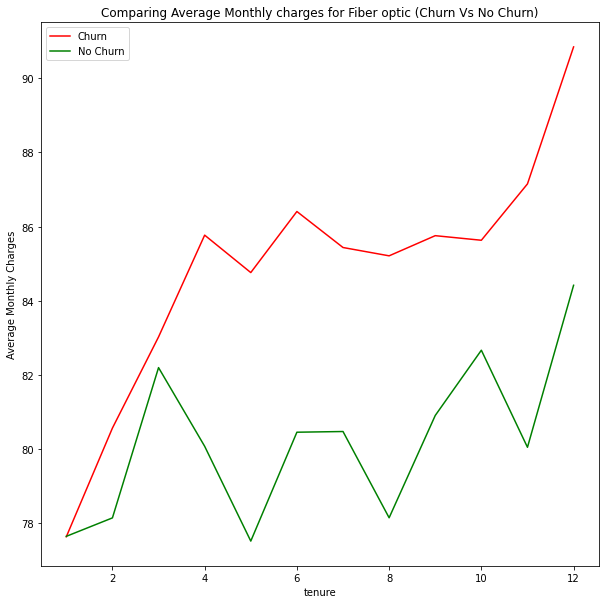

In [44]:


plt.figure(figsize= (10,10))
plt.ylabel('Average Monthly Charges')

churn[churn['internet_service_type_Fiber optic']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'red', label ='Churn')

no_churn[no_churn['internet_service_type_Fiber optic']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green', label ='No Churn')

plt.title('Comparing Average Monthly charges for Fiber optic (Churn Vs No Churn)')
plt.legend()
plt.show()

### 3. Is electornic check payment factor for churn 

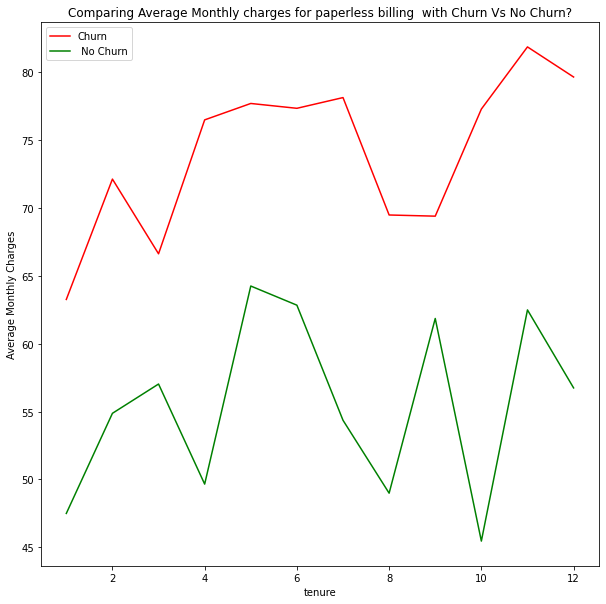

In [45]:
# lets check how the monthly average compares between churned customers with electornic check payment method 
plt.figure(figsize= (10,10))

plt.ylabel('Average Monthly Charges')

churn[churn['paperless_billing_encoded']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'red', label ='Churn')

no_churn[no_churn['paperless_billing_encoded']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green', label =' No Churn')

plt.title('Comparing Average Monthly charges for paperless billing  with Churn Vs No Churn?')
plt.legend()
plt.show()

### 4. Is being a senior citizen factor for Churn

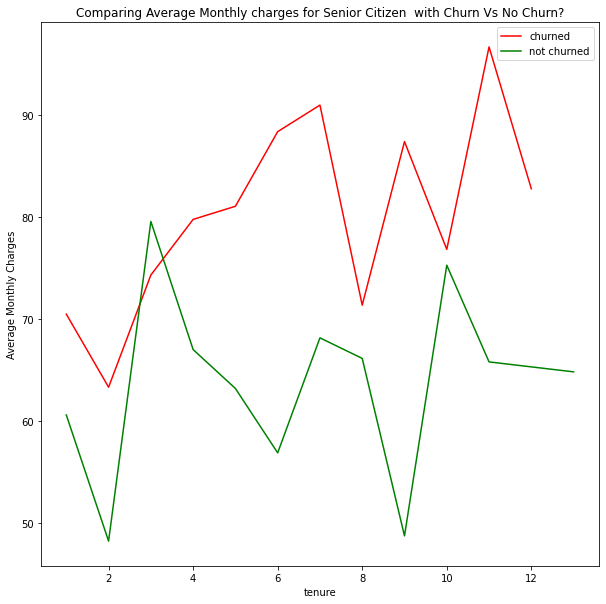

In [46]:
plt.figure(figsize= (10,10))

plt.ylabel('Average Monthly Charges')

churn[churn['senior_citizen']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'red', label = 'churned')

no_churn[no_churn['senior_citizen']==1].groupby('tenure').monthly_charges.mean().head(12).plot(color = 'green', label = 'not churned')

plt.title('Comparing Average Monthly charges for Senior Citizen  with Churn Vs No Churn?')
plt.legend()

plt.show()

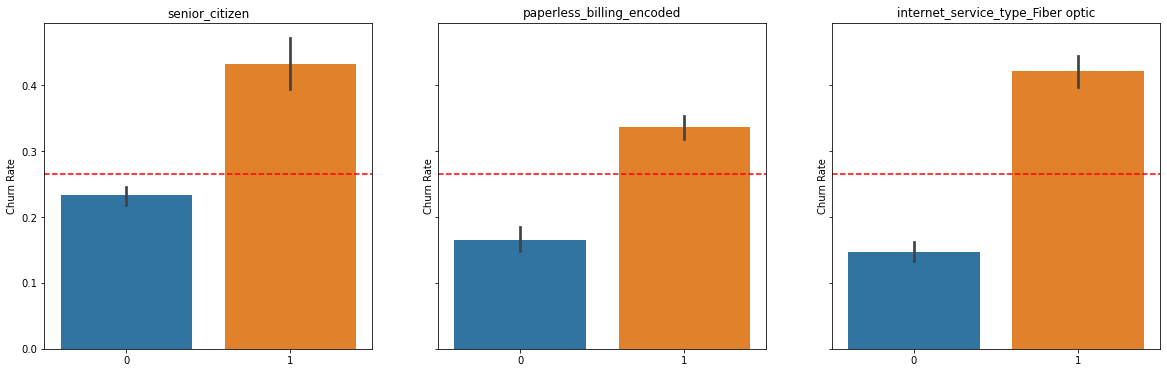

In [47]:
# Increased Rate of churn 

features = ['senior_citizen', 'paperless_billing_encoded', 'internet_service_type_Fiber optic']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn_encoded', data=telco_train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='red')

### Takeaway 

Higher Churn due to following factors: 
- Monthly charges
- Fiber Optic
- Payment method (Electornic Check)
- Senior Citizen

## Statistical Test 

- For Categorical Variable we need to perform CHI^2 test 

### monthly_charges VS Churn 
- H0: Churn is independent to monthly charges 
- H1: Churn is not independent to monthly charges 


In [48]:
from scipy import stats

In [49]:
a = 0.05 # Setting our significance level
observed_data = pd.crosstab(telco_train.churn_encoded, telco_train['monthly_charges'])

In [50]:
chi2, p, degf, expected = stats.chi2_contingency(observed_data)

In [51]:
chi2, p, degf, expected 

(1656.6070460451397,
 1.1213370658737025e-08,
 1346,
 array([[0.73431547, 0.73431547, 2.93726187, ..., 0.73431547, 0.73431547,
         0.73431547],
        [0.26568453, 0.26568453, 1.06273813, ..., 0.26568453, 0.26568453,
         0.26568453]]))

In [52]:
if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### Fiber Optic Vs Churn 
- H0:  Churn is independent to Internet type Fiber Optics 
- H1: Churn is not independient to Internet type Fiber Optics

In [53]:
# Make observation table 
index = ['Churn', 'No Churn']
columns = ['Fiber=1', 'Fiber=0']

a = 0.05 # Setting our significance level
observed1 = pd.DataFrame([[churn['internet_service_type_Fiber optic'].value_counts()[1], churn['internet_service_type_Fiber optic'].value_counts()[0]], [no_churn['internet_service_type_Fiber optic'].value_counts()[1], no_churn['internet_service_type_Fiber optic'].value_counts()[0]]], index=index, columns=columns)
observed1


,Fiber=1,Fiber=0
Churn,716,330
No Churn,982,1909


In [54]:
chi2, p, degf, expected = stats.chi2_contingency(observed1)

In [55]:
chi2, p, degf, expected 

(370.97219650069576,
 1.1495226539962088e-82,
 1,
 array([[ 451.13233426,  594.86766574],
        [1246.86766574, 1644.13233426]]))

In [56]:
if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### paperless billing Vs Churn 

- H0: Paperless billing is independent to churn
- H1: paperless billing is not independent to churn 

In [57]:
# Make observation table 
index = ['Churn', 'No Churn']
columns = ['Paperless=1', 'Paperless=0']
observed2 = pd.DataFrame([[churn.paperless_billing_encoded.value_counts()[1], churn.paperless_billing_encoded.value_counts()[0]], [no_churn.paperless_billing_encoded.value_counts()[1], no_churn.paperless_billing_encoded.value_counts()[0]]], index=index, columns=columns)
observed2

,Paperless=1,Paperless=0
Churn,779,267
No Churn,1540,1351


In [58]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

In [59]:
chi2, p, degf, expected 

(141.8042630948129,
 1.0731996015945446e-32,
 1,
 array([[ 616.12242824,  429.87757176],
        [1702.87757176, 1188.12242824]]))

In [60]:
if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### Senior citizen Vs Churn 
- H0: Senior Citizen is independent to Churn 
- H1: Senior Citizen is not independent to Churn 
    

In [61]:
# Make observation table

index = ['Churn', 'No Churn']
columns = ['Senior=1', 'Senior=0']

observed3 = pd.DataFrame([[churn.senior_citizen.value_counts()[1], churn.senior_citizen.value_counts()[0]], [no_churn.senior_citizen.value_counts()[1], no_churn.senior_citizen.value_counts()[0]]], index=index, columns=columns)
observed3

,Senior=1,Senior=0
Churn,280,766
No Churn,367,2524


In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed3)

In [63]:
chi2, p, degf, expected 

(109.76347560274587,
 1.1040911367340458e-25,
 1,
 array([[ 171.8978918,  874.1021082],
        [ 475.1021082, 2415.8978918]]))

In [64]:
if p<a:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Modeling 

In [65]:
telco_train.shape, telco_test.shape, telco_validate.shape

((3937, 47), (1407, 47), (1688, 47))

### Create baseline model 

In [66]:
baseline_accuracy= telco_train.churn_encoded.value_counts()[0]/len(telco_train)
baseline_accuracy 


print(f'The accuracy of baseline model is: {baseline_accuracy}')

The accuracy of baseline model is: 0.7343154686309372


  ### The accuracy of baseline model is 73%

In [67]:
#create X & y version of train, 
  # where y is a series with just the target variable and X are all the features. 

### LogisiticRegression 

## Model 1

In [68]:
def feature_target_selector(features, target, train=telco_train, validate=telco_validate, test=telco_test):
    X_train = train[features]
    y_train = train[target]
    X_validate = validate[features]
    y_validate = validate[target]
    X_test = test[features]
    y_test = test[target]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [69]:
telco_train.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_type_

In [72]:
features = ['senior_citizen', 'monthly_charges', 'tenure', 'paperless_billing_encoded', 'internet_service_type_Fiber optic', 'payment_type_Electronic check']
target = ['churn_encoded']
X_train, y_train, X_validate, y_validate, X_test, y_test = feature_target_selector(features, target)

In [74]:
logit1 = LogisticRegression(random_state=123, solver='lbfgs')
logit1.fit(X_train, y_train)
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[ 0.53974434  0.00978369 -0.04481712  0.49239456  0.89988463  0.53167343]]
Intercept: 
 [-1.54586777]


In [75]:
y_pred1 = logit1.predict(X_train)
y_pred1_proba = logit1.predict_proba(X_train)

In [76]:
confusion_matrix(y_train, y_pred1)

array([[2640,  251],
       [ 563,  483]])

In [77]:

# TP : 483
# FN: 563
# FP: 251
# TN: 2640

In [78]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      2891
           1       0.66      0.46      0.54      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.69      0.70      3937
weighted avg       0.78      0.79      0.78      3937



In [80]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train, y_train)))

print('F1 score of Logistic Regression classifier on training set: {:.2f}'
     .format(f1_score(y_train, y_pred1)))

recall_logit = tp/(tp+fn)

print('Recall of Logistic Regression classifier on training set: {:.2f}'
     .format(recall_logit))

Accuracy of Logistic Regression classifier on training set: 0.79
F1 score of Logistic Regression classifier on training set: 0.54


NameError: name 'tp' is not defined

In [81]:
logit1_accuracy = logit1.score(X_train, y_train)
logit1_accuracy

0.793243586487173

In [82]:
if logit1_accuracy > baseline_accuracy:
    print("Model 1 is better than baseline model")

Model 1 is better than baseline model


### Model 2 

In [83]:
logit2 = LogisticRegression(C = 0.10, random_state = 123) # hyperparameter c = 0.10


In [84]:
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=123)

In [85]:
logit2_accuracy= logit2.score(X_train, y_train)
logit2_accuracy

0.7962915925831852

In [86]:
y_pred2 = logit2.predict(X_train)

In [87]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2891
           1       0.67      0.47      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.69      0.71      3937
weighted avg       0.78      0.80      0.78      3937



In [88]:
if logit2_accuracy > baseline_accuracy:
    print("Model 2 is better than baseline model")

Model 2 is better than baseline model


### Decision Tree 

### Model 3

In [89]:
# keeping max_depth as 10 because of the number of predictor varaibles

clf3 = DecisionTreeClassifier(max_depth = 10, random_state = 123)

In [90]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=123)

In [91]:
decision_model_accuracy1 = clf3.score(X_train, y_train)

In [92]:
y_pred3 = clf3.predict(X_train)

In [93]:
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2891
           1       0.80      0.72      0.76      1046

    accuracy                           0.88      3937
   macro avg       0.85      0.83      0.84      3937
weighted avg       0.87      0.88      0.88      3937



In [94]:
if decision_model_accuracy1 > baseline_accuracy:
    print('Model 3 is better than baseline model')

Model 3 is better than baseline model


### Model 4 

In [95]:
# max depth of 5 

In [96]:
clf4 = DecisionTreeClassifier(max_depth = 5, random_state = 123)

In [97]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [98]:
decision_model_accuracy2 = clf4.score(X_train, y_train)

In [99]:
y_pred4 = clf4.predict(X_train)

In [100]:
print(classification_report(y_train, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2891
           1       0.64      0.55      0.59      1046

    accuracy                           0.80      3937
   macro avg       0.74      0.72      0.73      3937
weighted avg       0.79      0.80      0.79      3937



In [101]:
if decision_model_accuracy2 > baseline_accuracy:
    print('Model 4 is better than baseline model')

Model 4 is better than baseline model


## Random Forest Model 

In [102]:
rf1 = RandomForestClassifier(random_state = 123, max_depth = 5, min_samples_leaf = 5)

In [103]:
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=123)

In [104]:
random_forest_accuracy1 = rf1.score(X_train, y_train)

In [105]:
y_pred5 = rf1.predict(X_train)

In [106]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.70      0.45      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



In [107]:
if random_forest_accuracy1 > baseline_accuracy:
    print('Model 5 is better than baseline model')

Model 5 is better than baseline model


### Model 6 

In [108]:
# with max_depth = 5 and min_samples_leaf = 10

In [109]:
rf2 = RandomForestClassifier(random_state = 123, max_depth = 5, min_samples_leaf = 10)

In [110]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

In [111]:
random_forest_accuracy2 = rf2.score(X_train, y_train)
random_forest_accuracy2

0.8006096012192024

In [112]:
y_pred6 = rf2.predict(X_train)

In [113]:
print(classification_report(y_train, y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2891
           1       0.69      0.45      0.54      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.69      0.71      3937
weighted avg       0.79      0.80      0.79      3937



In [114]:
if random_forest_accuracy2 > baseline_accuracy:
    print('Model 6 is better than baseline model')

Model 6 is better than baseline model


## KNN Model 

In [115]:
knn1 = KNeighborsClassifier(n_neighbors = 10)

In [116]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [117]:
knn_accuracy1 = knn1.score(X_train, y_train)

In [118]:
y_pred7 = knn1.predict(X_train)

In [119]:
print(classification_report(y_train, y_pred7))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2891
           1       0.74      0.45      0.56      1046

    accuracy                           0.81      3937
   macro avg       0.79      0.70      0.72      3937
weighted avg       0.80      0.81      0.80      3937



In [120]:
if knn_accuracy1 > baseline_accuracy:
    print('Model 7 is better than baseline')

Model 7 is better than baseline


### Model 8 

In [121]:
# n_neighbors = 7 

In [122]:
knn2 = KNeighborsClassifier(n_neighbors = 7)

In [123]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [124]:
knn_accuracy2 = knn2.score(X_train, y_train)
knn_accuracy2

0.8277876555753112

In [125]:
y_pred8 = knn2.predict(X_train)

In [126]:
print(classification_report(y_train, y_pred8))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      2891
           1       0.73      0.56      0.64      1046

    accuracy                           0.83      3937
   macro avg       0.79      0.74      0.76      3937
weighted avg       0.82      0.83      0.82      3937



In [127]:
if knn_accuracy2 > baseline_accuracy:
    print('Model 8 is better than baseline')

Model 8 is better than baseline


In [128]:
print("Model 1: Logistic Regression")
print(classification_report(y_train, y_pred1))
print('-----------------------------------------------------')
print("Model 2: Logistic Regression")
print(classification_report(y_train, y_pred2))
print('-----------------------------------------------------')
print("Model 3: Decision tree max_depth = 10 ")
print(classification_report(y_train, y_pred3))
print('-----------------------------------------------------')
print("Model 4: Decision Tree max_depth = 5 ")
print(classification_report(y_train, y_pred4))
print('-----------------------------------------------------')
print("Model 5: Random Forest max_depth = 5, min_samples_leaf = 5 ")
print(classification_report(y_train, y_pred5))
print('-----------------------------------------------------')
print("Model 6: Random Forest max_depth = 5, min_samples_leaf = 10 ")
print(classification_report(y_train, y_pred6))
print('-----------------------------------------------------')
print("Model 7: KNN n_neighbprs =10 ")
print(classification_report(y_train, y_pred7))
print('-----------------------------------------------------')
print("Model 8: KNN n_neighbprs =7 ")
print(classification_report(y_train, y_pred8))
print('-----------------------------------------------------')

Model 1: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      2891
           1       0.66      0.46      0.54      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.69      0.70      3937
weighted avg       0.78      0.79      0.78      3937

-----------------------------------------------------
Model 2: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2891
           1       0.67      0.47      0.55      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.69      0.71      3937
weighted avg       0.78      0.80      0.78      3937

-----------------------------------------------------
Model 3: Decision tree max_depth = 10 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2891
           1       0.80      0.7

In [129]:
## Model Performance on validate 

In [130]:
print("Model 1: Logistic Regression")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))
y_pred1 = logit.predict(X_validate)

print(confusion_matrix(y_validate, y_pred1))

print(classification_report(y_validate, y_pred1))

Model 1: Logistic Regression


NameError: name 'logit' is not defined

In [131]:
print("Model 3: Decision Tree")

print('Accuracy: {:.2f}'.format(clf3.score(X_validate, y_validate)))

y_pred3 = clf3.predict(X_validate)

print(confusion_matrix(y_validate, y_pred3))

print(classification_report(y_validate, y_pred3))

Model 3: Decision Tree
Accuracy: 0.77
[[1054  185]
 [ 202  247]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1239
           1       0.57      0.55      0.56       449

    accuracy                           0.77      1688
   macro avg       0.71      0.70      0.70      1688
weighted avg       0.77      0.77      0.77      1688



In [132]:
print("Model 4: Decision Tree")

print('Accuracy: {:.2f}'.format(clf4.score(X_validate, y_validate)))

y_pred4 = clf4.predict(X_validate)

print(confusion_matrix(y_validate, y_pred4))

print(classification_report(y_validate, y_pred4))

Model 4: Decision Tree
Accuracy: 0.78
[[1070  169]
 [ 202  247]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1239
           1       0.59      0.55      0.57       449

    accuracy                           0.78      1688
   macro avg       0.72      0.71      0.71      1688
weighted avg       0.78      0.78      0.78      1688



In [133]:
print("Model 5: Random Forest")
print('Accuracy: {:.2f}'.format(rf1.score(X_validate, y_validate)))
y_pred5 = rf1.predict(X_validate)

print(confusion_matrix(y_validate, y_pred5))

print(classification_report(y_validate, y_pred5))

Model 5: Random Forest
Accuracy: 0.80
[[1139  100]
 [ 236  213]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1239
           1       0.68      0.47      0.56       449

    accuracy                           0.80      1688
   macro avg       0.75      0.70      0.72      1688
weighted avg       0.79      0.80      0.79      1688



In [134]:
print("Model 6: Random Forest")
print('Accuracy: {:.2f}'.format(rf2.score(X_validate, y_validate)))
y_pred6 = rf2.predict(X_validate)

print(confusion_matrix(y_validate, y_pred6))

print(classification_report(y_validate, y_pred6))

Model 6: Random Forest
Accuracy: 0.80
[[1140   99]
 [ 243  206]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1239
           1       0.68      0.46      0.55       449

    accuracy                           0.80      1688
   macro avg       0.75      0.69      0.71      1688
weighted avg       0.78      0.80      0.78      1688



In [135]:
print("Model 7: K-Nearest Neighbors")

print('Accuracy: {:.2f}'.format(knn1.score(X_validate, y_validate)))

y_pred7 = knn1.predict(X_validate)

print(confusion_matrix(y_validate, y_pred7))

print(classification_report(y_validate, y_pred7))

Model 7: K-Nearest Neighbors
Accuracy: 0.78
[[1138  101]
 [ 270  179]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1239
           1       0.64      0.40      0.49       449

    accuracy                           0.78      1688
   macro avg       0.72      0.66      0.68      1688
weighted avg       0.76      0.78      0.76      1688



In [136]:
print("Model 8: K-Nearest Neighbors")

print('Accuracy: {:.2f}'.format(knn2.score(X_validate, y_validate)))

y_pred8 = knn2.predict(X_validate)

print(confusion_matrix(y_validate, y_pred8))

print(classification_report(y_validate, y_pred8))

Model 8: K-Nearest Neighbors
Accuracy: 0.77
[[1091  148]
 [ 243  206]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1239
           1       0.58      0.46      0.51       449

    accuracy                           0.77      1688
   macro avg       0.70      0.67      0.68      1688
weighted avg       0.76      0.77      0.76      1688



### Model 6 Random Forest has the highest accuracy of 80% and recall of 46%  

In [137]:
# Model Performance on Test 

SyntaxError: invalid syntax (<ipython-input-137-715b325034b5>, line 1)

In [140]:
print("Test Performance: Random Forest")

print('Accuracy: {:.4f}'.format(rf2.score(X_test, y_test)))

y_pred6 = logit1.predict(X_test)

print(confusion_matrix(y_test, y_pred6))

print(classification_report(y_test, y_pred6))

Test Performance: Random Forest
Accuracy: 0.7910
[[940  93]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.50      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



### Baseline has an accuracy of 73.43%
### The developed Random Forest model has accuracy of 79.10% 

## Prepare CSV File 

## SUMMARY 


- Telco churn rate is 27%
- Key driver for Telco churn are Monthly charges, Fiber Optic, Electornic Check and being a Senior Citizen
- Model has an accuracy of 79% 
- This model can be deployed to identify customers with higher chance to churn. Once those are identified Telco marketing team coluld provide incentives to keep those customers. 
- With more time i would like to acquire location specific data to analyze what other factors is resulting Telco churn. Other factors includes quality of service, competitors and their insentives etc.  
